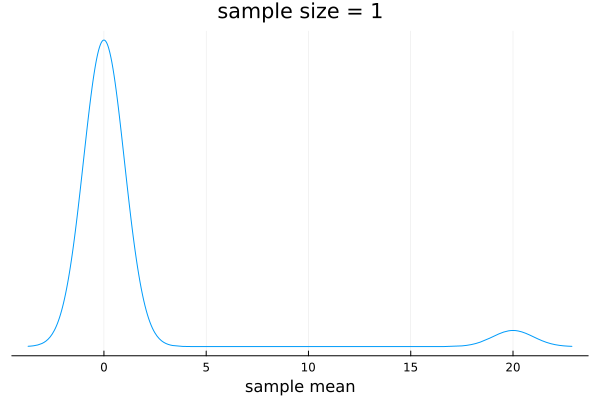

[ Info: Saved animation to D:\OneDrive\public\0053\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0053\\tmp.gif")
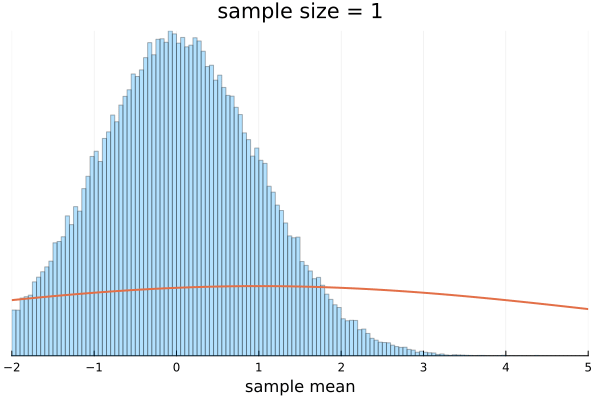

In [1]:
# JuliaLang

using Distributions
using Random
using StatsPlots
default(fmt=:png)

function gifclt(;
        dist = MixtureModel([Normal(), Normal(20)], [0.95, 0.05]),
        nsamples = 10^5,
        bin = -2:0.05:5,
        nmin = 1,
        nmax = 200,
    )
    plot(1dist; label="", title="sample size = 1", ytick=false, yaxis=false, xguide="sample mean") |> display
    Xmean = zeros(nsamples)
    P = fill(plot())
    @gif for n in nmin:nmax+40
        if n ≤ nmax
            X = rand(dist, n)
            for i in 1:nsamples
                Xmean[i] = mean(rand!(dist, X))
            end
            P[] = histogram(Xmean; norm=true, alpha=0.3, label="", bin)
            plot!(Normal(mean(dist), std(dist)/√n), extrema(bin)...; label="", lw=2)
            plot!(ytick=false, yaxis=false, xlim=extrema(bin), xguide="sample mean")
            title!("sample size = $n")
        else
            P[]
        end
    end
end

gifclt()

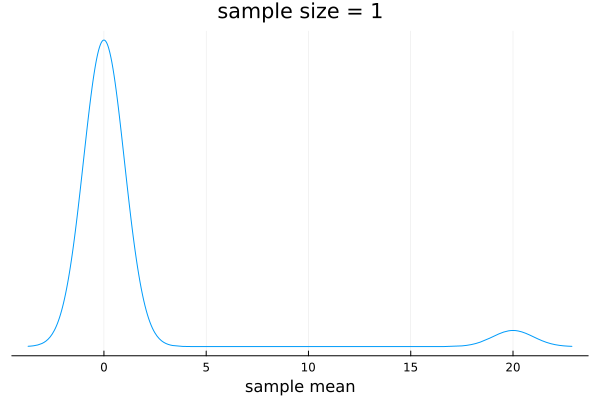

[ Info: Saved animation to D:\OneDrive\public\0053\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0053\\tmp.gif")
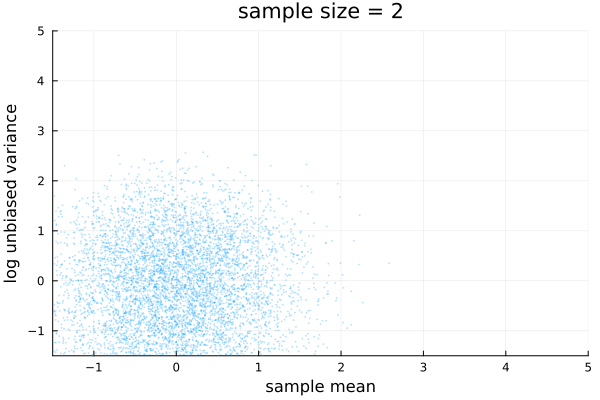

In [2]:
# JuliaLang

using Distributions
using Random
using StatsPlots
default(fmt=:png)

function gifmeanvar(;
        dist = MixtureModel([Normal(), Normal(20)], [0.95, 0.05]),
        nsamples = 10^4,
        xmin = -1.5,
        xmax = 5,
        ymin = -1.5,
        ymax = 5,
        nmin = 2,
        nmax = 1000,
        nsteps = 200, 
    )
    plot(1dist; label="", title="sample size = 1", ytick=false, yaxis=false, xguide="sample mean") |> display
    Xmean = zeros(nsamples)
    Xlogvar = zeros(nsamples)
    P = fill(plot())
    ns = round.(Int, exp.(range(log(nmin), log(nmax), nsteps+1)))
    @gif for n in [ns; fill(nmax+1, 40)]
        if n ≤ nmax
            Xtmp = rand(dist, n)
            for i in 1:nsamples
                X = rand!(dist, Xtmp)
                Xmean[i] = mean(X)
                Xlogvar[i] = log(var(X))
            end
            P[] = scatter(Xmean, Xlogvar; label="", msc=:auto, ms=1, ma=0.3)
            plot!(xlim=(xmin, xmax), ylim=(ymin, ymax))
            plot!(xguide="sample mean", yguide="log unbiased variance")
            title!("sample size = $n")
        else
            P[]
        end
    end
end

gifmeanvar()

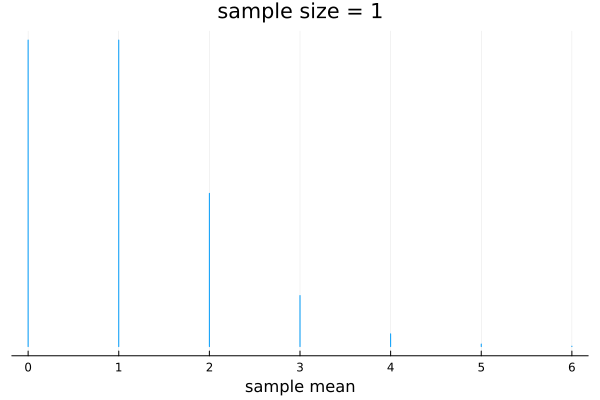

[ Info: Saved animation to D:\OneDrive\public\0053\tmp.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0053\\tmp.gif")
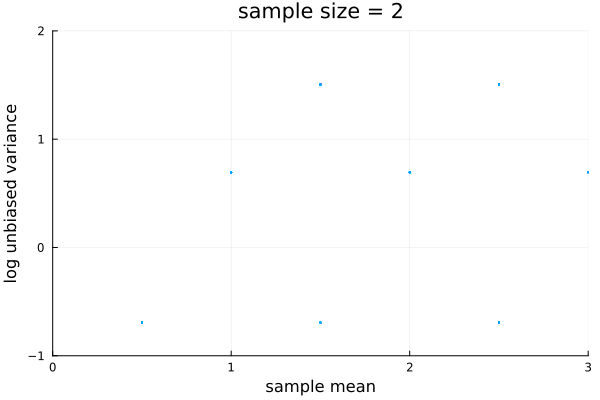

In [3]:
gifmeanvar(; dist=Poisson(), xmin=0, xmax=3, ymin=-1, ymax=2, nmax=500)